In [113]:
import glob
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [114]:
def get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=0, n_small_users=4):
    dirs = glob.glob("results/*")
    temp = []
    for dir in dirs:
        with open(dir + "/param.json", "r") as f:
            params = json.load(f)
        
        if params["noise_for_small"]==noise_for_small and params["noise_for_large"]==noise_for_large and params["share_abnormal_ratio"]==share_abnormal_ratio and params["n_small_users"]==n_small_users:
            with open(dir + "/result.pkl", "rb") as f:
                temp.append(pickle.load(f))
                temp.append(params["epsilon"])
    assert len(temp)==2, f"{len(temp)} data included"
    return temp[0], temp[1]

eval_score_transform = {"f1": 5, "auroc":4, "precision":3, "recall":2, "accuracy":1, "loss": 0}

In [167]:
eval_score = "auroc"

大規模、小規模ともににDPを導入
epsilon < 0.25　あたりで影響が出始める


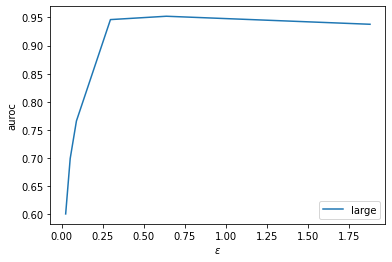

In [168]:
epsilons = []
large_results = []
small_results = []
noises = [2,5,10,30,50,100]

for noise in noises:
    results, epsilon = get_results(noise_for_small=noise, noise_for_large=noise, share_abnormal_ratio=0, n_small_users=4)
    epsilons.append(epsilon)
    large_results.append(results[eval_score_transform[eval_score]][-1][0])
    small_results.append(results[eval_score_transform[eval_score]][-1].mean())

#plt.plot(epsilons, small_results, label="small")
plt.plot(epsilons, large_results, label="large")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel(eval_score)

print("大規模、小規模ともににDPを導入")
print("epsilon < 0.25　あたりで影響が出始める")

小規模だけにDPを導入
epsilon < 0.25 だけを見てみると、ノイズを小規模だけに加えてもあまり影響はない？
むしろノイズを加えることで精度が上がっている？


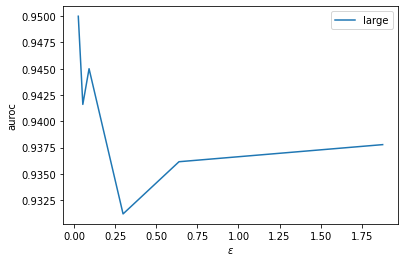

In [169]:
epsilons = []
large_results = []
small_results = []
noise_for_smalls = [2,5,10,30,50,100]

for noise_for_small in noise_for_smalls:
    results, epsilon = get_results(noise_for_small=noise_for_small, noise_for_large=0, share_abnormal_ratio=0, n_small_users=4)
    epsilons.append(epsilon)
    large_results.append(results[eval_score_transform[eval_score]][-1][0])
    small_results.append(results[eval_score_transform[eval_score]][-1].mean())

#plt.plot(epsilons, small_results, label="small")
plt.plot(epsilons, large_results, label="large")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel(eval_score)

print("小規模だけにDPを導入")
print("epsilon < 0.25 だけを見てみると、ノイズを小規模だけに加えてもあまり影響はない？")
print("むしろノイズを加えることで精度が上がっている？")

only large w/o DP w/o FLは大規模がDPもFLも導入していない。
largeは小規模だけにDPを導入してFL
ノイズを加えた勾配を加えるなら、FLしない方が良い？


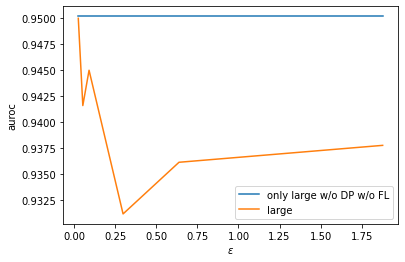

In [170]:
epsilons = []
large_results = []
only_large_wo_noise_results = []
noise_for_smalls = [2,5,10,30,50,100]

for noise_for_small in noise_for_smalls:
    results, epsilon = get_results(noise_for_small=noise_for_small, noise_for_large=0, share_abnormal_ratio=0, n_small_users=4)
    results_only_large_wo_noise, _ = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=0, n_small_users=0)
    epsilons.append(epsilon)
    large_results.append(results[eval_score_transform[eval_score]][-1][0])
    only_large_wo_noise_results.append(results_only_large_wo_noise[eval_score_transform[eval_score]][-1][0])
    # small_results.append(results[eval_score_transform[eval_score]][-1].mean())

plt.plot(epsilons, only_large_wo_noise_results, label="only large w/o DP w/o FL")
plt.plot(epsilons, large_results, label="large")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel(eval_score)

print("only large w/o DP w/o FLは大規模がDPもFLも導入していない。")
print("largeは小規模だけにDPを導入してFL")
print("ノイズを加えた勾配を加えるなら、FLしない方が良い？")

only large w/o は大規模だけでDP導入、FLをしていない。
largeは小規模、大規模ともにDP導入
大規模がDPを導入している場合、FLをした方が良い？


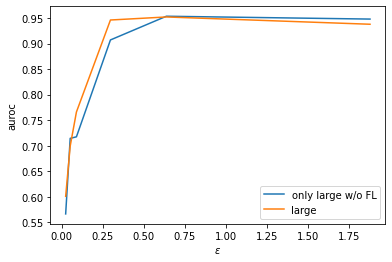

In [171]:
epsilons = []
large_results = []
only_large_results = []
small_results = []

large_results_only_large = []

noises = [2,5,10,30,50,100]

for noise in noises:
    eval_code = eval_score_transform[eval_score]
    results, epsilon = get_results(noise_for_small=noise, noise_for_large=noise, share_abnormal_ratio=0, n_small_users=4)
    results_only_large, _ = get_results(noise_for_small=noise, noise_for_large=noise, share_abnormal_ratio=0, n_small_users=0)
    epsilons.append(epsilon)
    only_large_results.append(results_only_large[eval_code][-1][0])
    large_results.append(results[eval_code][-1][0])
    small_results.append(results[eval_code][-1].mean())

plt.plot(epsilons, only_large_results, label="only large w/o FL")
plt.plot(epsilons, large_results, label="large")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel(eval_score)

print("only large w/o は大規模だけでDP導入、FLをしていない。")
print("largeは小規模、大規模ともにDP導入")
print("大規模がDPを導入している場合、FLをした方が良い？")

異常値を共有しているFLにDPを導入
ノイズを加えた方が精度が上がる？
そもそも、ノイズを加えないものの精度が低い


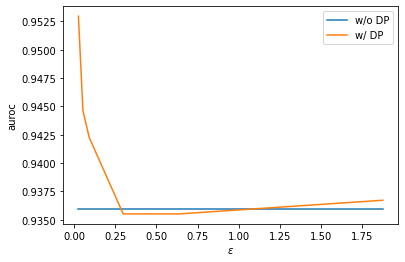

In [173]:
epsilons = []
large_results = []
wo_dp_results = []

noises = [2,5,10,30,50,100]

for noise in noises:
    eval_code = eval_score_transform[eval_score]
    results, epsilon = get_results(noise_for_small=noise, noise_for_large=0, share_abnormal_ratio=1, n_small_users=4)
    results_wo_dp, _ = get_results(noise_for_small=0, noise_for_large=0, share_abnormal_ratio=1, n_small_users=4)
    epsilons.append(epsilon)
    large_results.append(results[eval_code][-1][0])
    wo_dp_results.append(results_wo_dp[eval_code][-1][0])

plt.plot(epsilons, wo_dp_results, label="w/o DP")
plt.plot(epsilons, large_results, label="w/ DP")
plt.legend()
plt.xlabel("$\epsilon$")
plt.ylabel(eval_score)

print("異常値を共有しているFLにDPを導入")
print("ノイズを加えた方が精度が上がる？")
print("そもそも、ノイズを加えなかった結果の精度が低い")

In [174]:
epsilons

[1.8779529277399676,
 0.637932979000583,
 0.2974046879415248,
 0.09029930666788034,
 0.052350843745613426,
 0.02477811952966677]